In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/output_Farline.root")

In [3]:
f.cd("farline")

True

In [4]:
f.ls()

TFile**		/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/output_Farline.root	
 TFile*		/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/output_Farline.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo2

Print all of the embedded histograms

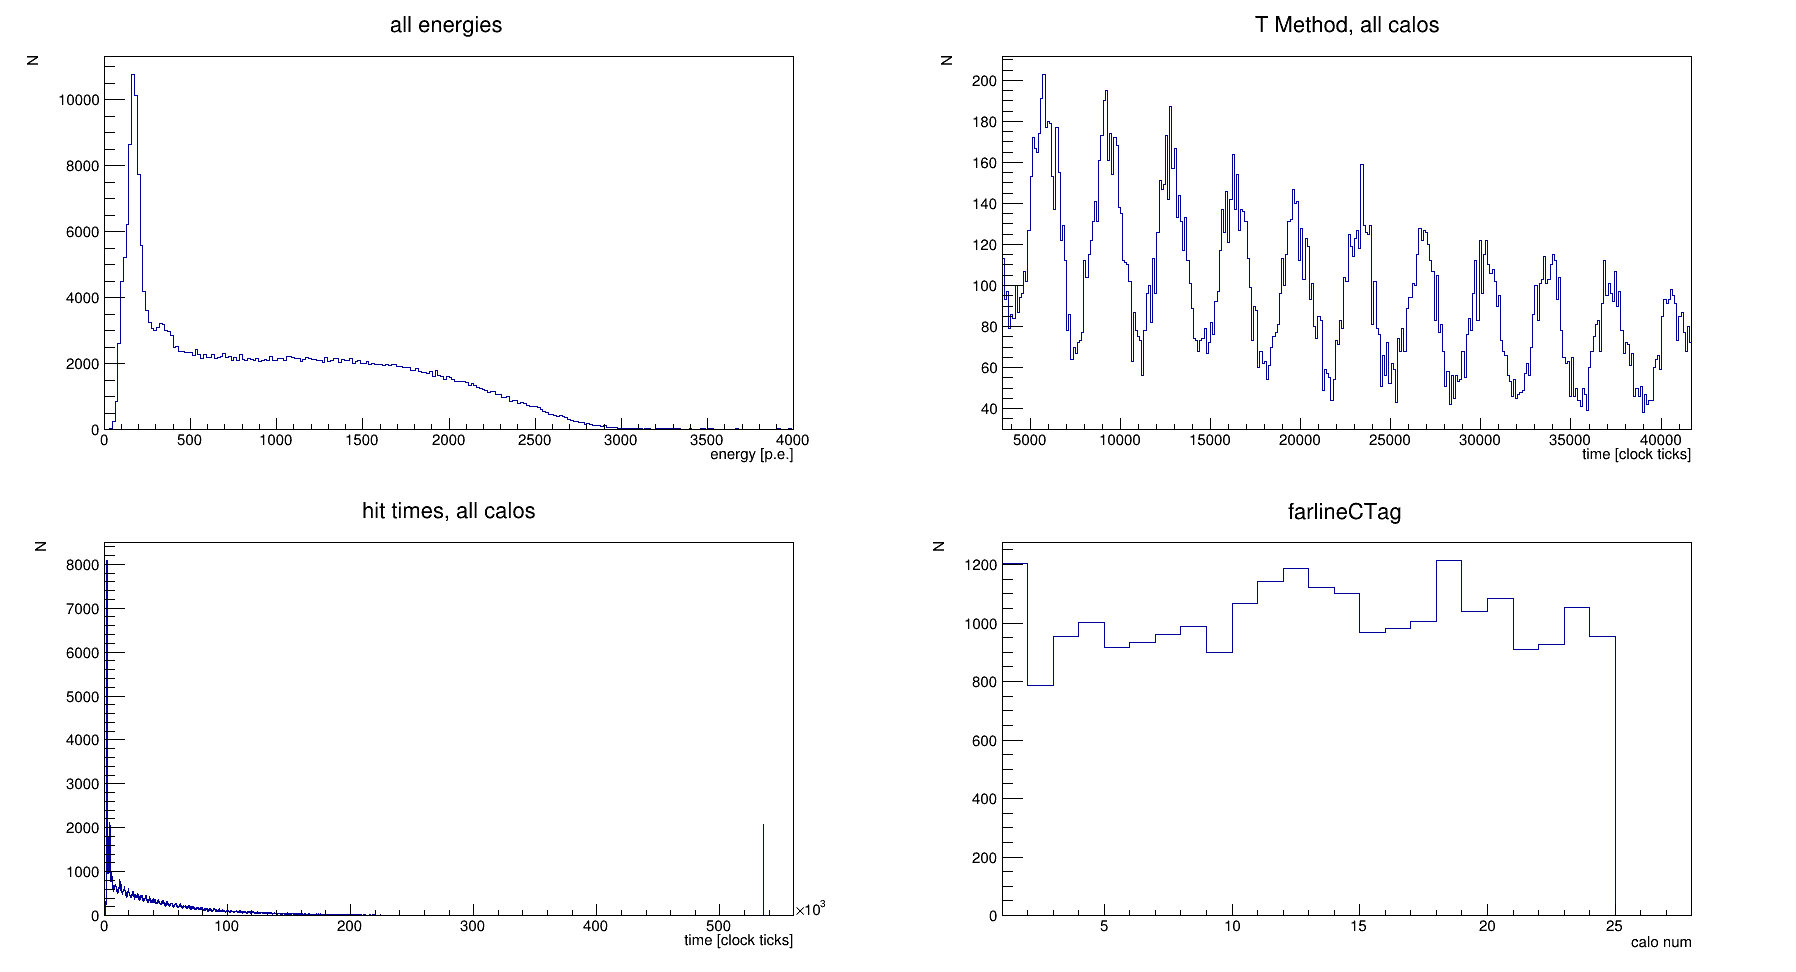

In [15]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.Draw()

c.cd(4)
farlineCtag = f.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()